In [1]:
import snappy
from snappy import ProductIO
import datetime
import sys
import os
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from netCDF4 import Dataset
from scipy import signal
import cv2
import calibrate
import direction
%matplotlib inline
subsetop = snappy.jpy.get_type('org.esa.snap.core.gpf.common.SubsetOp')
wktreader = snappy.jpy.get_type('com.vividsolutions.jts.io.WKTReader')
pixelpos = snappy.jpy.get_type('org.esa.snap.core.datamodel.PixelPos')
geopos = snappy.jpy.get_type('org.esa.snap.core.datamodel.GeoPos')

In [7]:
with os.popen('cd /Volumes/Yangchao/subset/ \n ls *.dim') as flist:
    for f in flist:
        print(f)
        dataset = ProductIO.readProduct('/Volumes/Yangchao/subset/'+f[:-1])
        product = calibrate.calibrate(dataset)
        ProductIO.writeProduct(product, '/Volumes/Yangchao/subset_cal/'+f[:-1], 'NETCDF4-CF')
        dataset.dispose()
        product.dispose()

Ascending_41001_subset_132_ 4.0_4.0_S1A_IW_GRDH_1SDV_20170629T224915_20170629T224940_017255_01CCB2_E50C.dim

-----calibrate----
Ascending_41001_subset_201_ 5.9_4.0_S1A_IW_GRDH_1SDV_20170711T224915_20170711T224940_017430_01D200_26BF.dim

-----calibrate----
Ascending_41001_subset_225_10.4_4.0_S1A_IW_GRDH_1SDV_20170723T224916_20170723T224941_017605_01D74D_1B1F.dim

-----calibrate----
Ascending_41002_subset_181_ 4.4_5.0_S1A_IW_GRDH_1SDV_20170709T230453_20170709T230518_017401_01D117_1C5B.dim

-----calibrate----
Ascending_41002_subset_193_ 3.4_5.0_S1A_IW_GRDH_1SDV_20170522T230450_20170522T230515_016701_01BBB0_8C4E.dim

-----calibrate----
Ascending_41002_subset_199_ 4.7_5.0_S1A_IW_GRDH_1SDV_20170721T230453_20170721T230518_017576_01D66A_9258.dim

-----calibrate----
Ascending_41002_subset_222_ 3.0_5.0_S1A_IW_GRDH_1SDV_20170627T230452_20170627T230517_017226_01CBD2_C568.dim

-----calibrate----
Ascending_41004_subset_194_ 5.8_4.0_S1A_IW_GRDH_1SDV_20170702T231315_20170702T231340_017299_01CE10_C1B4.


-----calibrate----
Ascending_44041_subset_ 32_ 1.9_3.0_S1A_IW_GRDH_1SDV_20170522T230605_20170522T230630_016701_01BBB0_8D17.dim

-----calibrate----
Ascending_44058_subset_147_ 3.9_3.0_S1A_IW_GRDH_1SDV_20170529T225803_20170529T225828_016803_01BED2_4D37.dim

-----calibrate----
Ascending_44058_subset_188_ 4.9_3.0_S1A_IW_GRDH_1SDV_20170517T225803_20170517T225828_016628_01B96F_03F1.dim

-----calibrate----
Ascending_44065_subset_ 96_ 7.4_5.0_S1A_IW_GRDH_1SDV_20170723T225031_20170723T225056_017605_01D74D_AA68.dim

-----calibrate----
Ascending_44065_subset_ 96_ 7.4_5.0_S1A_IW_GRDH_1SDV_20170723T225031_20170723T225056_017605_01D74D_AA68.zip.dim

-----calibrate----
Ascending_44065_subset_198_12.4_5.0_S1A_IW_GRDH_1SDV_20170629T225030_20170629T225055_017255_01CCB2_7C93.dim

-----calibrate----
Ascending_44065_subset_209_ 4.7_5.0_S1A_IW_GRDH_1SDV_20170711T225030_20170711T225055_017430_01D200_45C1.dim

-----calibrate----
Ascending_44066_subset_ 90_ 6.6_5.0_S1A_IW_GRDH_1SDV_20170723T225031_20170723T22

-----calibrate----
Ascending_46061_subset_108_ 3.6_5.0_S1B_IW_GRDH_1SDV_20170523T031848_20170523T031917_005720_00A055_CF85.dim

-----calibrate----
Ascending_46061_subset_355_ 5.1_5.0_S1B_IW_GRDH_1SDV_20170521T033513_20170521T033542_005691_009F84_A68C.dim

-----calibrate----
Ascending_46069_subset_188_ 1.1_5.0_S1B_IW_GRDH_1SDV_20170526T015734_20170526T015759_005763_00A197_7A11.dim

-----calibrate----
Ascending_46069_subset_297_ 7.2_5.0_S1B_IW_GRDH_1SDV_20170519T020543_20170519T020608_005661_009EA1_F4DF.dim

-----calibrate----
Ascending_46076_subset_ 14_ 8.8_5.0_S1B_IW_GRDH_1SDV_20170521T033513_20170521T033542_005691_009F84_A68C.dim

-----calibrate----
Ascending_46081_subset_259_ 5.3_5.0_S1B_IW_GRDH_1SDV_20170521T033513_20170521T033542_005691_009F84_A68C.dim

-----calibrate----
Ascending_46086_subset_248_ 1.7_5.0_S1B_IW_GRDH_1SDV_20170526T015705_20170526T015734_005763_00A197_F34D.dim

-----calibrate----
Ascending_46086_subset_284_ 8.4_5.0_S1B_IW_GRDH_1SDV_20170521T014854_20170521T014919_

Ascending_lonf1_subset_251_ 4.6_7.0_S1A_IW_GRDH_1SDV_20170525T232718_20170525T232743_016745_01BD07_5279.dim

-----calibrate----
Ascending_mism1_subset_143_ 6.3_22.9_S1B_IW_GRDH_1SDV_20170527T222612_20170527T222640_005790_00A262_A826.dim

-----calibrate----
Ascending_mism1_subset_347_ 5.4_22.9_S1A_IW_GRDH_1SDV_20170526T223501_20170526T223526_016759_01BD80_0095.dim

-----calibrate----
Ascending_mlrf1_subset_227_ 3.4_15.8_S1A_IW_GRDH_1SDV_20170525T232743_20170525T232808_016745_01BD07_0389.dim

-----calibrate----
Ascending_mrka2_subset_210_ 2.6_15.9_S1B_IW_GRDH_1SDV_20170523T031848_20170523T031917_005720_00A055_CF85.dim

-----calibrate----
Ascending_nwpo3_subset_311_ 4.0_9.4_S1B_IW_GRDH_1SDV_20170531T020839_20170531T020904_005836_00A3AE_F54B.dim

-----calibrate----
Ascending_nwpo3_subset_343_ 3.8_9.4_S1B_IW_GRDH_1SDV_20170519T020838_20170519T020903_005661_009EA1_BBF6.dim

-----calibrate----
Ascending_pila2_subset_189_ 1.1_6.6_S1B_IW_GRDH_1SDV_20170521T033513_20170521T033542_005691_009F84_A

Descending_desw1_subset_287_ 0.1_31.4_S1B_IW_GRDH_1SDV_20170522T142850_20170522T142915_005712_00A01B_C4AD.dim

-----calibrate----
Descending_iosn3_subset_241_ 7.9_19.2_S1B_IW_GRDH_1SDV_20170519T104739_20170519T104808_005666_009ECB_5585.dim

-----calibrate----
Descending_mism1_subset_158_ 9.1_22.9_S1B_IW_GRDH_1SDV_20170531T104740_20170531T104759_005841_00A3D8_AB50.dim

-----calibrate----
Descending_nwpo3_subset_ 23_ 2.2_9.4_S1B_IW_GRDH_1SDV_20170522T142940_20170522T143005_005712_00A01B_E663.dim

-----calibrate----
Descending_nwpo3_subset_351_ 8.1_9.4_S1A_IW_GRDH_1SDV_20170523T142220_20170523T142245_016710_01BBF3_FC94.dim

-----calibrate----
Descending_ptgc1_subset_  1_11.5_9.4_S1A_IW_GRDH_1SDV_20170520T140010_20170520T140035_016666_01BA9A_7C2B.dim

-----calibrate----
Descending_spgf1_subset_179_ 4.8_6.6_S1A_IW_GRDH_1SDV_20170523T110938_20170523T111007_016708_01BBE5_2CA1.dim

-----calibrate----


In [3]:
da = Dataset('/Volumes/Yangchao/subset_cal/Ascending_41002_subset_181_ 4.4_5.0_S1A_IW_GRDH_1SDV_20170709T230453_20170709T230518_017401_01D117_1C5B.dim')

In [4]:
da.variables.keys()

odict_keys(['Sigma0_VH', 'Sigma0_VV', 'latitude', 'longitude', 'incident_angle', 'elevation_angle', 'slant_range_time', 'lat', 'lon'])

In [22]:
Bx=0.5*np.array([1,1])
Bx_2 = 1/4*np.array([1,2,1])
By_2 = 1/4*np.array([1,2,1]).reshape((-1,1))
Bxay_2 = 1/4*np.array([[0,0,1],[0,2,0],[1,0,0]])
Bxsy_2 = 1/4*np.array([[1,0,0],[0,2,0],[0,0,1]])
B_2 = By_2*Bx_2

In [23]:
B_2

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

In [ ]:
B2_2 = 1/16*np.array([[1,0,2,0,1],
                      [0,0,0,0,0],
                      [2,0,4,0,2],
                      [0,0,0,0,0],
                      [1,0,2,0,1]])
B4x_2 = 1/4*np.array([1,0,0,0,2,0,0,0,1])
B2_4= np.array([

In [8]:
sigma_vv = da.variables['Sigma0_VV'][:]

In [9]:
%matplotlib inline

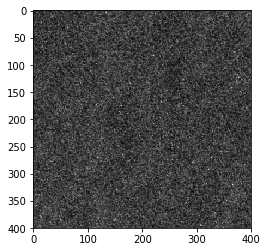

In [72]:
plt.imshow(10*np.log10(sigma_vv),'Greys')

In [30]:
from numpy import *
from numpy import linalg as LA
from numpy import random
from scipy.ndimage import filters
from scipy.misc import imsave
from PIL import Image
import matplotlib.pyplot as plt


def denoise(im, U_init, tolerance=0.1, tau=0.125, tv_weight=100):
    m, n = im.shape  # 噪声图像的大小
    U = U_init
    Px = im  # 对偶域的x 分量
    Py = im  # 对偶域的y 分量
    error = 1

    while (error > tolerance):
        Uold = U

        GradUx = roll(U, -1, axis=1) - U  # 变量U 梯度的x 分量
        GradUy = roll(U, -1, axis=0) - U  # 变量U 梯度的y 分量

        PxNew = Px + (tau / tv_weight) * GradUx
        PyNew = Py + (tau / tv_weight) * GradUy
        NormNew = maximum(1, sqrt(PxNew ** 2 + PyNew ** 2))

        Px = PxNew / NormNew  # 更新x 分量（对偶）
        Py = PyNew / NormNew  # 更新y 分量（对偶）

        RxPx = roll(Px, 1, axis=1)  # 对x 分量进行向右x 轴平移
        RyPy = roll(Py, 1, axis=0)  # 对y 分量进行向右y 轴平移

        DivP = (Px - RxPx) + (Py - RyPy)  # 对偶域的散度
        U = im + tv_weight * DivP  # 更新原始变量

        # 更新误差
        error = linalg.norm(U - Uold) / sqrt(n * m)
    return U, im - U



In [31]:
u,t = denoise(sigma_vv,sigma_vv)

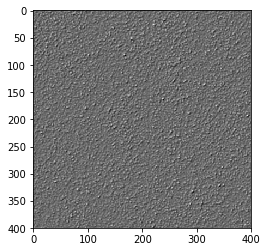

In [32]:
plt.imshow(u, 'gray')

In [60]:
s_f = fft.fft2(sigma_vv)


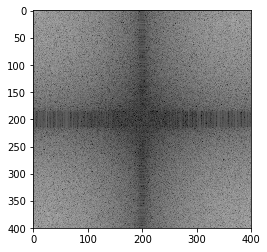

In [39]:
plt.imshow(np.log(np.abs(s_f)), 'gray')

In [61]:
s_f_c = fft.fftshift(s_f)

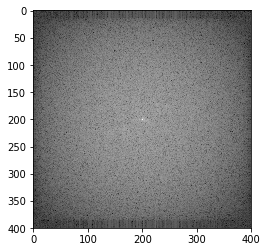

In [43]:
plt.imshow(np.log(np.abs(s_f_c)), 'gray')
plt.tick_params(False)

In [62]:
s_f_c[0:150,:]=0

In [63]:
s_f_c[:,0:150]=0

In [64]:
s_f_c[250:400,:]=0

In [65]:
s_f_c[:,250:400]=0

In [56]:
s_f_c[170:220,170:220]=0

/Users/yangchao/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


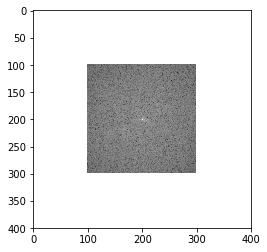

In [49]:
plt.imshow(np.log(np.abs(s_f_c)), 'gray')

In [66]:
i_s_f = fft.ifftshift(s_f_c)

In [67]:
i_s = fft.ifft2(i_s_f)

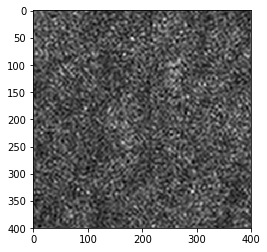

In [68]:
plt.imshow(np.abs(i_s),'gray')

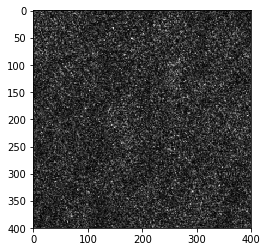

In [69]:
plt.imshow(sigma_vv,'gray')

In [76]:
s_m = signal.medfilt2d(sigma_vv)
s_m1 = signal.medfilt2d(s_m)

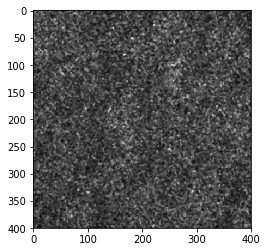

In [77]:
plt.imshow(s_m1, 'gray')

In [79]:
samplt = np.resize(sigma_vv, (200,200))

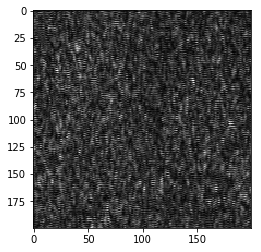

In [80]:
plt.imshow(samplt,'gray')

In [81]:
import cv2

In [10]:
dd = cv2.pyrDown(sigma_vv, dstsize=(200,200))

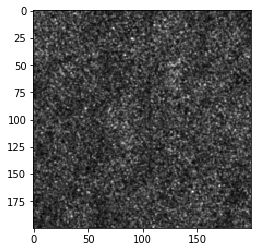

In [85]:
plt.imshow(dd,'gray')

In [92]:
by_4 = cv2.getGaussianKernel(7,0)

In [93]:
bx_4 = np.squeeze(by_4)

In [94]:
bx_4

array([0.03125 , 0.109375, 0.21875 , 0.28125 , 0.21875 , 0.109375,
       0.03125 ])

In [99]:
b_4 = by_4*bx_4

In [96]:
by_2 = cv2.getGaussianKernel(3,0)

In [97]:
bx_2 = np.squeeze(by_2)

In [100]:
b_2 = by_2*bx_2

In [106]:
s_b_2 = signal.convolve2d(dd, b_2,mode='valid')

In [107]:
s_b2_b4 = signal.convolve2d(s_b_2, b_4,mode='valid')

In [108]:
s_b2_b4.shape

(192, 192)

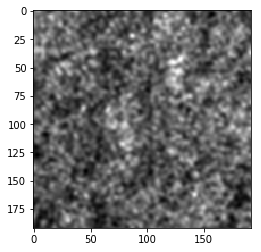

In [111]:
plt.imshow(s_b2_b4,'gray')

In [11]:
def R(im):
    by_4 = cv2.getGaussianKernel(7,0)
    bx_4 = np.squeeze(by_4)
    by_2 = cv2.getGaussianKernel(3,0)
    bx_2 = np.squeeze(by_2)
    b_4 = by_4*bx_4
    b_2 = by_2*bx_2
    s_b_2 = signal.convolve2d(im, b_2,mode='same')
    s_b2_b4 = signal.convolve2d(s_b_2, b_4,mode='same')
    return s_b2_b4

In [12]:
def sobel(img):
    r = np.array([[3,0,-3],[10,0,-10],[3,0,-3]])/32
    d = r+r.T*1j
    ss = signal.convolve2d(img, d, mode='same')
    return ss

In [13]:
def measure(sob):
    r_1 = R(np.power(sob,2))
    r_2 = R(np.power(np.abs(sob),2))
    return np.abs(r_1)/r_2, r_1

In [14]:
sobel_vv = sobel(dd)
cor, r = measure(sobel_vv)

In [15]:
q = r[1:-1,1:-1].real/r[1:-1,1:-1].imag

In [28]:
angel= np.arctan(q)*180/np.pi

In [25]:
angel = np.arctan(q.real/q.imag)*180/np.pi

/Users/yangchao/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [29]:
angel = angel%180

In [30]:
angel

array([[ 97.9162144 , 141.19026065,  77.99647391, ...,  78.55683771,
         37.97577449, 176.22402249],
       [106.74771529, 118.16275734, 102.88199281, ...,  74.73469275,
        135.65628691, 129.35118686],
       [109.75679358, 107.05224406, 166.57962575, ...,  87.63690767,
         89.52516058,  97.21406418],
       ...,
       [ 91.37933017,  49.65923059, 139.63456544, ..., 160.09391625,
         66.30970191,  73.16983784],
       [129.03620862, 179.15103335, 100.83775326, ..., 119.09628021,
          7.27921061,  47.17600961],
       [172.90015033,  35.62230433,  78.42511014, ..., 116.30974315,
        145.52092691,  12.31524482]])

In [31]:
x1, x2 = np.histogram(angel, bins=range(0,181, 5))

In [32]:
argsort = np.argsort(x1)

In [33]:
x1

array([ 970,  927, 1006,  962,  945, 1002, 1069, 1027, 1067, 1093, 1111,
       1082, 1091, 1112, 1129, 1178, 1194, 1203, 1217, 1227, 1197, 1177,
       1126, 1150, 1175, 1161, 1206, 1083, 1085, 1108, 1047, 1019, 1058,
        987,  984, 1029])

In [34]:
argsort[-4:]

array([17, 26, 18, 19])

In [35]:
x2[argsort[-4:]]


array([ 85, 130,  90,  95])

In [ ]:
x2[sortrg

In [165]:
x2[30]

150

([array([ 1.,  3.,  1.,  0.,  1.,  4.,  0.,  1.,  0.,  5.,  7.,  4.,  7.,
         17.,  8., 12., 15., 14., 28., 17., 22., 12.,  7.,  2.,  3.,  2.,
          2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.]),
  array([ 1.,  2.,  1.,  2.,  4.,  1.,  5.,  5.,  6.,  7.,  8.,  5.,  3.,
          6.,  9.,  8., 12.,  9., 17., 14., 16., 14.,  9.,  7.,  5.,  2.,
          1.,  3.,  2.,  1.,  2.,  3.,  3.,  2.,  0.,  3.]),
  array([ 4.,  6.,  3.,  9.,  2.,  6.,  5.,  3.,  1.,  2.,  4.,  2.,  5.,
          8.,  6.,  7.,  9., 12.,  6.,  8.,  7.,  7., 11., 11.,  5.,  4.,
          6.,  4.,  3.,  1.,  6.,  9.,  4.,  5.,  4.,  3.]),
  array([ 3.,  4.,  8.,  5.,  4.,  4.,  4.,  4.,  7.,  6.,  2.,  6.,  4.,
          6.,  3.,  5.,  4.,  5., 10., 10.,  3.,  2.,  3.,  7., 10., 13.,
          5.,  9.,  7.,  5., 10.,  6.,  2.,  8.,  2.,  2.]),
  array([5., 3., 4., 6., 5., 7., 8., 6., 5., 8., 5., 8., 6., 5., 5., 3., 8.,
         6., 4., 7., 4., 6., 9., 7., 7., 8., 5., 3., 7., 6., 5., 1., 2., 5.,
         4

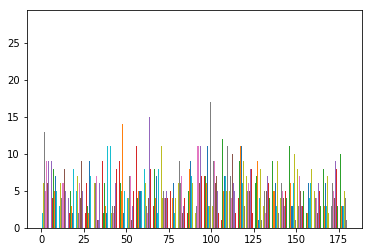

In [36]:
plt.hist(angel, bins=range(0,181, 5))

In [137]:
sobel_vv.shape

(398, 398)

In [124]:
sobel_vv

(array([[-0.00038797-1.66058402e-04j, -0.00290089+4.33460544e-03j,
          0.00076564+4.67305759e-03j, ..., -0.00026062+3.24814988e-04j,
         -0.00247031+1.89393379e-03j, -0.00073343+2.09695974e-03j],
        [ 0.00166463+9.39500169e-04j, -0.00043543+1.80920011e-03j,
          0.00025609+3.07301374e-03j, ...,  0.00176169+2.34064752e-03j,
         -0.00140407+3.70961975e-03j, -0.00149865+3.39232144e-03j],
        [ 0.00094862+5.09689262e-03j, -0.00046821+3.33000661e-03j,
         -0.00039202+1.43393243e-03j, ...,  0.00319405-1.28318046e-04j,
         -0.00110309+1.16550564e-03j, -0.00333963-1.59590854e-07j],
        ...,
        [ 0.00121391-4.44107944e-04j,  0.00425747+2.21644693e-03j,
          0.00245544+7.38372757e-04j, ...,  0.00030548+1.09033649e-03j,
         -0.0018198 +2.61432410e-03j,  0.00041858+4.40004776e-04j],
        [ 0.00270863+1.63177523e-04j,  0.00480737+5.54135477e-06j,
          0.00086498+3.05569847e-05j, ...,  0.00261698-9.90880071e-05j,
         -0.00103346

In [4]:
def dirc(**kw):
    if 're' in kw:
        print(kw['re'])

In [5]:
dirc(re=True)

True


In [2]:
ndbc_station = pd.read_csv('./ndbc_station_information.csv')

In [3]:
ndbc_station.set_index('name', inplace=True)

In [4]:
label = {}
label['ndbc_wdir']=[]
label['ndbc_wspeed']=[]
label['ecmwf_u_front']=[]
label['ecmwf_v_front']=[]
label['ecmwf_u_late']=[]
label['ecmwf_v_late']=[]
label['sar'] =[]
label['station']=[]

In [5]:
def ecmwf_wind_information(filename1, lat, lon):
    ecmwf_data = ProductIO.readProduct('/Volumes/Yangchao/sar_ecmwf_mask/'+filename1)
    names=ecmwf_data.getBandNames()
    band = []
    value = []
    ecmwf_geo = ecmwf_data.getSceneGeoCoding()
    p = ecmwf_geo.getPixelPos(geopos(lat, lon), None)
    ecmwf_nc = Dataset('/Volumes/Yangchao/sar_ecmwf_mask_nc/'+filename1[:-3])
    sigma = ecmwf_nc.variables[names[0]][:]
    if p.x>sigma.shape[0]:
        return False
    else:
        for name in names:
            band = ecmwf_data.getBand(name)
            value.append(band.readPixels(int(p.x), int(p.y), 1, 1, np.zeros(1)).squeeze())
        ecmwf_data.dispose()
        ecmwf_geo.dispose()
        ecmwf_nc.close()
        del ecmwf_data
        del ecmwf_geo
        del ecmwf_nc
        gc.collect()
        return value
# match up data with station
def match_up(filename, file2, stations, height, width,filename2):
    print('match_up...')
#    file = ProductIO.readProduct(filepath+filename)
    geo = file2.getSceneGeoCoding()
    size = file2.getSceneRasterSize()
    if geo.canGetGeoPos():
        for station in stations.index:
            p1 = geo.getPixelPos(geopos(stations.loc[station,'lat'], stations.loc[station,'lon']), None)
            if p1.getX() == None:
                continue
            x = p1.getX() - height / 2
            y = p1.getY() - width / 2
            if file2.containsPixel(p1) and file2.containsPixel(pixelpos(int(x), int(y))) and file2.containsPixel(pixelpos(int(x+height),int(y+width))):
                
                flist = filename.split('_')
                wdir, wspeed = calibrate.wind_filed_from_ndbc(station, flist[-5],'/Volumes/Yangchao/data/ndbc')
                if wdir == 0 or wspeed == 0 or wspeed==99 or wdir==999 or wdir == '0' or wspeed == '0' or wspeed== '99' or wdir=='999' :
                    continue
                else:
                    if size.getHeight() > height and size.getWidth() > width:
                        print('subset')
                        subfile = calibrate.subset(file2,Region=True, x=int(x), y=int(y), height=height, width=height)
                        if subfile is False:
                            print('cut exception')
                            continue
                        print('write...')
                        value = ecmwf_wind_information(filename2, stations.loc[station,'lat'], stations.loc[station,'lon'])
                        if value is False:
                            continue
                        try:
                            ProductIO.writeProduct(subfile, '/Volumes/Yangchao/subset_/subset_'+filename, 'BEAM-DIMAP')
                            label['sar'].append(filename)
                            label['station'].append(station)
                            label['ndbc_wdir'].append(wdir)
                            label['ndbc_wspeed'].append(wspeed)
                            label['ecmwf_u_front'].append(value[0])
                            label['ecmwf_v_front'].append(value[2])
                            label['ecmwf_u_late'].append(value[1])
                            label['ecmwf_v_late'].append(value[3])
                        except Exception:
                            print('exception')
                            print(Exception)
                            subfile.dispose()
                            continue
                        subfile.dispose()
                        del subfile
    else:
        print(filename + " can't get geo pos")

    del size
    del geo
    file2.dispose()
    del file2
    gc.collect()


In [16]:
d = ProductIO.readProduct('/Volumes/Yangchao/sar_ecmwf_mask/Ascending_S1A_IW_GRDH_1SDV_20151130T220943_20151130T221012_008840_00C9FD_0DAE.dim')

In [17]:
names = d.getBandNames()

In [18]:
names[1]

'u10_time245'

In [19]:
band=d.getBand(names[1])

In [21]:
with os.popen('cd /Volumes/Yangchao/sar_ecmwf_mask/ \n ls *.dim') as f:
    for file1 in f:
        pro = ProductIO.readProduct('/Volumes/Yangchao/sar_ecmwf_mask/'+file1[:-1])
        ProductIO.writeProduct(pro, '/Volumes/Yangchao/sar_ecmwf_mask_nc/'+file1[:-4], 'NETCDF4-CF')
        pro.dispose()
        gc.collect()

In [22]:
value = band.readPixels(1,1,1,1,np.zeros(1))

In [24]:
value.squeeze()

array(5.49311828)

In [33]:
ndbc_station.head(5)

height     lat     lon
name                         
0y2w3    10.0  44.794 -87.313
13001     4.0  12.000 -23.000
13002     4.0  21.000 -23.000
13008     4.0  15.000 -38.000
13009     4.0   8.000 -38.000

In [6]:
with os.popen('cd /Volumes/Yangchao/sar_ecmwf_mask/ \n ls *.dim') as f:
    for file1 in f:
        print(file1)
        product = ProductIO.readProduct('/Volumes/Yangchao/Sentient/'+'_'.join(file1.split('_')[1:])[:-5]+'.zip')
        product_t = calibrate.thermal_app(product)
        product_c = calibrate.calibrate(product_t)
        match_up('_'.join(file1.split('_')[1:])[:-5], product_c, ndbc_station, 400, 400, file1[:-1])
        product.dispose()
        product_t.dispose()
        product_c.dispose()
        del product
        del product_t
        del product_c
        gc.collect()

Ascending_S1A_IW_GRDH_1SDV_20151130T220943_20151130T221012_008840_00C9FD_0DAE.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20151205T221118_20151205T221153_008913_00CC14_65F9.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20151205T221739_20151205T221808_008913_00CC15_AF7D.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20151205T221808_20151205T221833_008913_00CC15_3E91.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20151229T221738_20151229T221807_009263_00D5E2_2C99.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20151229T221807_20151229T221832_009263_00D5E2_977F.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_2

Ascending_S1A_IW_GRDH_1SDV_20160315T222648_20160315T222713_010386_00F634_A901.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
subset
----subset----
write...
subset
----subset----
write...
subset
----subset----
write...
subset
----subset----
write...
Ascending_S1A_IW_GRDH_1SDV_20160317T220252_20160317T220317_010415_00F70A_FFB4.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20160317T220317_20160317T220345_010415_00F70A_AA98.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20160322T221123_20160322T221151_010488_00F920_79A5.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20160322T221620_20160322T221649_010488_00F921_137F.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20160322T221649_20160322T221714_010488_


----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20160504T220858_20160504T220923_011115_010C08_2029.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20160504T220923_20160504T220948_011115_010C08_F13F.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20160504T220948_20160504T221013_011115_010C08_9CEC.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20160508T231125_20160508T231150_011174_010DF7_07E0.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20160509T221126_20160509T221154_011188_010E62_E7E2.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20160509T221622_20160509T221651_011188_010E63_F0A8.dim

----thermal remove----
----

Ascending_S1A_IW_GRDH_1SDV_20160614T221626_20160614T221655_011713_011F42_935E.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20160614T221655_20160614T221720_011713_011F42_A73A.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20160614T221720_20160614T221745_011713_011F42_3B9A.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20160614T221745_20160614T221810_011713_011F42_1145.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20160614T221810_20160614T221835_011713_011F42_35B1.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20160701T222601_20160701T222626_011961_012715_426D.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_2


----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20160806T222538_20160806T222603_012486_01385A_4B1F.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20160806T222603_20160806T222628_012486_01385A_7761.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20160806T222628_20160806T222653_012486_01385A_32FA.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20160806T222653_20160806T222718_012486_01385A_4106.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
subset
----subset----
write...
subset
----subset----
write...
subset
----subset----
write...
subset
----subset----
write...
Ascending_S1A_IW_GRDH_1SDV_20160808T220259_20160808T220324_012515_013947_1006.dim

----thermal remove----
----apply orbit file----
-----calibrate---

-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20160911T222046_20160911T222118_013011_0149A7_1A72.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20160911T222445_20160911T222521_013011_0149A8_D591.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20160913T220814_20160913T220843_013040_014A9A_DD42.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20160913T220843_20160913T220908_013040_014A9A_B738.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20160913T220908_20160913T220933_013040_014A9A_CDCC.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20160913T220933_20160913T220958_013040_014A9A_3573.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up.


----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20161216T222044_20161216T222112_014411_0175CB_E9C8.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20161221T223437_20161221T223506_014484_01781F_2D83.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
subset
----subset----
write...
subset
----subset----
write...
subset
----subset----
write...
Ascending_S1A_IW_GRDH_1SDV_20161230T220300_20161230T220325_014615_017C25_A901.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20161230T220325_20161230T220353_014615_017C25_8DDB.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20170407T232741_20170407T232806_016045_01A7AA_3330.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
subset
----subset

-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20170421T231156_20170421T231221_016249_01ADF0_03CF.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20170421T231221_20170421T231246_016249_01ADF0_C87E.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
subset
----subset----
write...
Ascending_S1A_IW_GRDH_1SDV_20170421T231246_20170421T231311_016249_01ADF0_5056.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20170421T231311_20170421T231336_016249_01ADF0_2DDB.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
subset
----subset----
write...
Ascending_S1A_IW_GRDH_1SDV_20170422T023716_20170422T023741_016251_01ADFF_DC95.dim

----thermal remove----
----apply orbit file----
-----calibrate----
match_up...
Ascending_S1A_IW_GRDH_1SDV_20170422T023741_20170422T023806_016251_01ADFF_F3C9.dim

----thermal re

RuntimeError: java.lang.IllegalArgumentException: The specified region, if not null, must intersect with the image`s bounds.

In [40]:
product = ProductIO.readProduct('/Volumes/Yangchao/Sentinel_scending/Ascending_S1A_IW_GRDH_1SDV_20151130T220943_20151130T221012_008840_00C9FD_0DAE.zip')

In [7]:
subset_1300 = pd.DataFrame(label)

In [9]:
subset_1300.describe()

ecmwf_u_front        ecmwf_u_late       ecmwf_v_front  \
count                   68                  68                  68   
unique                  57                  57                  57   
top     -39.23412763964547  -39.23412763964547  -44.59899477198817   
freq                    12                  12                  12   

              ecmwf_v_late ndbc_wdir ndbc_wspeed  \
count                   68        68          68   
unique                  56        65          49   
top     -44.59899477198817       203        10.9   
freq                    12         2           4   

                                                      sar station  
count                                                  68      68  
unique                                                 35      18  
top     S1A_IW_GRDH_1SDV_20160718T223435_20160718T2235...   44005  
freq                                                    3      12

In [14]:
subset_1300['ndbc_wdir'] = subset_1300['ndbc_wdir'].astype('int32')

In [10]:
subset_1300.to_csv('./sar_ndbc_ecmwf_dataset_subset_2000.csv')

In [16]:
subset_1300['ndbc_wspeed'] = subset_1300['ndbc_wdir'].astype('int32')

In [10]:
label = pd.read_csv('./sar_ndbc_ecmwf_dataset_subset_1300.csv')

TypeError: parser_f() got an unexpected keyword argument 'index'

In [4]:
label.describe()

Unnamed: 0  ecmwf_u_front  ecmwf_u_late  ecmwf_v_front  ecmwf_v_late  \
count   53.000000      53.000000     53.000000      53.000000     53.000000   
mean    26.000000      -6.150238     -6.092179      -9.099158     -8.449858   
std     15.443445      17.569675     17.576089      18.894645     19.185299   
min      0.000000     -39.234128    -39.234128     -44.598995    -44.598995   
25%     13.000000      -5.632966     -4.959392      -9.023183     -6.647252   
50%     26.000000       2.268201      2.478996      -1.952011     -0.813045   
75%     39.000000       4.613596      4.223504       4.261125      3.451000   
max     52.000000      10.479504     13.440321       8.758190      8.938944   

        ndbc_wdir  ndbc_wspeed  
count   53.000000    53.000000  
mean   183.584906   183.584906  
std     89.769884    89.769884  
min      1.000000     1.000000  
25%    135.000000   135.000000  
50%    198.000000   198.000000  
75%    234.000000   234.000000  
max    358.000000   358.000000

In [5]:
label.head(5)

Unnamed: 0  ecmwf_u_front  ecmwf_u_late  ecmwf_v_front  ecmwf_v_late  \
0           0      -1.998574      2.246395      -2.391918     -3.099688   
1           1      10.479504      6.840266      -1.451127      3.451000   
2           2       9.987649      5.926822      -1.958544      2.451410   
3           3      10.239634     13.440321      -9.534955     -6.647252   
4           4       9.226850     12.168284      -9.023183     -6.375032   

   ndbc_wdir  ndbc_wspeed                                                sar  \
0        133          133  S1A_IW_GRDH_1SDV_20160110T221737_20160110T2218...   
1        211          211  S1A_IW_GRDH_1SDV_20160220T222648_20160220T2227...   
2        203          203  S1A_IW_GRDH_1SDV_20160220T222648_20160220T2227...   
3        266          266  S1A_IW_GRDH_1SDV_20160303T222648_20160303T2227...   
4        291          291  S1A_IW_GRDH_1SDV_20160303T222648_20160303T2227...   

  station  
0   44011  
1   44005  
2   mism1  
3   44005  
4   mism1

In [11]:
label.columns

Index(['Unnamed: 0', 'ecmwf_u_front', 'ecmwf_u_late', 'ecmwf_v_front',
       'ecmwf_v_late', 'ndbc_wdir', 'ndbc_wspeed', 'sar', 'station'],
      dtype='object')

In [12]:
del label['Unnamed: 0']

In [13]:
label.head(5)


ecmwf_u_front  ecmwf_u_late  ecmwf_v_front  ecmwf_v_late  ndbc_wdir  \
0      -1.998574      2.246395      -2.391918     -3.099688        133   
1      10.479504      6.840266      -1.451127      3.451000        211   
2       9.987649      5.926822      -1.958544      2.451410        203   
3      10.239634     13.440321      -9.534955     -6.647252        266   
4       9.226850     12.168284      -9.023183     -6.375032        291   

   ndbc_wspeed                                                sar station  
0          133  S1A_IW_GRDH_1SDV_20160110T221737_20160110T2218...   44011  
1          211  S1A_IW_GRDH_1SDV_20160220T222648_20160220T2227...   44005  
2          203  S1A_IW_GRDH_1SDV_20160220T222648_20160220T2227...   mism1  
3          266  S1A_IW_GRDH_1SDV_20160303T222648_20160303T2227...   44005  
4          291  S1A_IW_GRDH_1SDV_20160303T222648_20160303T2227...   mism1

In [14]:
label.to_csv('./sar_ndbc_ecmwf_dataset_subset_1300.csv',index=False)

In [15]:
label = pd.read_csv('./sar_ndbc_ecmwf_dataset_subset_1300.csv')

In [16]:
label.head(5)

ecmwf_u_front  ecmwf_u_late  ecmwf_v_front  ecmwf_v_late  ndbc_wdir  \
0      -1.998574      2.246395      -2.391918     -3.099688        133   
1      10.479504      6.840266      -1.451127      3.451000        211   
2       9.987649      5.926822      -1.958544      2.451410        203   
3      10.239634     13.440321      -9.534955     -6.647252        266   
4       9.226850     12.168284      -9.023183     -6.375032        291   

   ndbc_wspeed                                                sar station  
0          133  S1A_IW_GRDH_1SDV_20160110T221737_20160110T2218...   44011  
1          211  S1A_IW_GRDH_1SDV_20160220T222648_20160220T2227...   44005  
2          203  S1A_IW_GRDH_1SDV_20160220T222648_20160220T2227...   mism1  
3          266  S1A_IW_GRDH_1SDV_20160303T222648_20160303T2227...   44005  
4          291  S1A_IW_GRDH_1SDV_20160303T222648_20160303T2227...   mism1

In [17]:
label['ecmwf_wspeed_front']=np.sqrt(label['ecmwf_u_front']**2+label['ecmwf_v_front']**2)

In [19]:
label.describe()

ecmwf_u_front  ecmwf_u_late  ecmwf_v_front  ecmwf_v_late   ndbc_wdir  \
count      53.000000     53.000000      53.000000     53.000000   53.000000   
mean       -6.150238     -6.092179      -9.099158     -8.449858  183.584906   
std        17.569675     17.576089      18.894645     19.185299   89.769884   
min       -39.234128    -39.234128     -44.598995    -44.598995    1.000000   
25%        -5.632966     -4.959392      -9.023183     -6.647252  135.000000   
50%         2.268201      2.478996      -1.952011     -0.813045  198.000000   
75%         4.613596      4.223504       4.261125      3.451000  234.000000   
max        10.479504     13.440321       8.758190      8.938944  358.000000   

       ndbc_wspeed  ecmwf_wspeed_front  
count    53.000000           53.000000  
mean    183.584906           17.622351  
std      89.769884           21.728357  
min       1.000000            0.955548  
25%     135.000000            5.668924  
50%     198.000000            7.797347  
75%     234.000000           10.579497  
max     358.000000           59.400228

In [20]:
label.loc[0,'sar']

'S1A_IW_GRDH_1SDV_20160110T221737_20160110T221806_009438_00DADC_26EB'

In [22]:
d=[]
s=[]
for i in range(53):
    wdir, wspeed = calibrate.wind_filed_from_ndbc(label.loc[i,'station'], label.loc[i,'sar'].split('_')[-5],'/Volumes/Yangchao/data/ndbc')
    d.append(wdir)
    s.append(wspeed)

In [23]:
d[:5]

['133', '211', '203', '266', '291']

In [24]:
s[:5]

['10.6', '10.2', '13.6', ' 6.6', ' 8.6']

In [25]:
s = np.array(s,dtype='float')

In [26]:
s[:5]

array([10.6, 10.2, 13.6,  6.6,  8.6])

In [27]:
label['ndbc_wspeed']=s

In [28]:
label.head(5)

ecmwf_u_front  ecmwf_u_late  ecmwf_v_front  ecmwf_v_late  ndbc_wdir  \
0      -1.998574      2.246395      -2.391918     -3.099688        133   
1      10.479504      6.840266      -1.451127      3.451000        211   
2       9.987649      5.926822      -1.958544      2.451410        203   
3      10.239634     13.440321      -9.534955     -6.647252        266   
4       9.226850     12.168284      -9.023183     -6.375032        291   

   ndbc_wspeed                                                sar station  \
0         10.6  S1A_IW_GRDH_1SDV_20160110T221737_20160110T2218...   44011   
1         10.2  S1A_IW_GRDH_1SDV_20160220T222648_20160220T2227...   44005   
2         13.6  S1A_IW_GRDH_1SDV_20160220T222648_20160220T2227...   mism1   
3          6.6  S1A_IW_GRDH_1SDV_20160303T222648_20160303T2227...   44005   
4          8.6  S1A_IW_GRDH_1SDV_20160303T222648_20160303T2227...   mism1   

   ecmwf_wspeed_front  
0            3.116981  
1           10.579497  
2           10.177870  
3           13.991621  
4           12.905525

In [29]:
label['ecmwf_wspeed_late']=np.sqrt(label['ecmwf_u_late']**2+label['ecmwf_v_late']**2)

In [30]:
label.head(5)

ecmwf_u_front  ecmwf_u_late  ecmwf_v_front  ecmwf_v_late  ndbc_wdir  \
0      -1.998574      2.246395      -2.391918     -3.099688        133   
1      10.479504      6.840266      -1.451127      3.451000        211   
2       9.987649      5.926822      -1.958544      2.451410        203   
3      10.239634     13.440321      -9.534955     -6.647252        266   
4       9.226850     12.168284      -9.023183     -6.375032        291   

   ndbc_wspeed                                                sar station  \
0         10.6  S1A_IW_GRDH_1SDV_20160110T221737_20160110T2218...   44011   
1         10.2  S1A_IW_GRDH_1SDV_20160220T222648_20160220T2227...   44005   
2         13.6  S1A_IW_GRDH_1SDV_20160220T222648_20160220T2227...   mism1   
3          6.6  S1A_IW_GRDH_1SDV_20160303T222648_20160303T2227...   44005   
4          8.6  S1A_IW_GRDH_1SDV_20160303T222648_20160303T2227...   mism1   

   ecmwf_wspeed_front  ecmwf_wspeed_late  
0            3.116981           3.828101  
1           10.579497           7.661504  
2           10.177870           6.413785  
3           13.991621          14.994272  
4           12.905525          13.737109

In [34]:
label['ecmwf_wdir_late']=np.arctan2(label['ecmwf_u_late'],label['ecmwf_v_late'])*180/np.pi

In [35]:
label['ecmwf_wdir_front']=np.arctan2(label['ecmwf_u_front'],label['ecmwf_v_front'])*180/np.pi

In [36]:
label.head(5)

ecmwf_u_front  ecmwf_u_late  ecmwf_v_front  ecmwf_v_late  ndbc_wdir  \
0      -1.998574      2.246395      -2.391918     -3.099688        133   
1      10.479504      6.840266      -1.451127      3.451000        211   
2       9.987649      5.926822      -1.958544      2.451410        203   
3      10.239634     13.440321      -9.534955     -6.647252        266   
4       9.226850     12.168284      -9.023183     -6.375032        291   

   ndbc_wspeed                                                sar station  \
0         10.6  S1A_IW_GRDH_1SDV_20160110T221737_20160110T2218...   44011   
1         10.2  S1A_IW_GRDH_1SDV_20160220T222648_20160220T2227...   44005   
2         13.6  S1A_IW_GRDH_1SDV_20160220T222648_20160220T2227...   mism1   
3          6.6  S1A_IW_GRDH_1SDV_20160303T222648_20160303T2227...   44005   
4          8.6  S1A_IW_GRDH_1SDV_20160303T222648_20160303T2227...   mism1   

   ecmwf_wspeed_front  ecmwf_wspeed_late  ecmwf_wdir_late  ecmwf_wdir_front  
0            3.116981           3.828101       144.068537       -140.119451  
1           10.579497           7.661504        63.228482         97.883778  
2           10.177870           6.413785        67.529380        101.094727  
3           13.991621          14.994272       116.315865        132.959097  
4           12.905525          13.737109       117.650295        134.360616

In [37]:
with os.popen('cd /Volumes/Yangchao/subset_1300// \n ls *.dim') as f:
    for file1 in f:
        pro = ProductIO.readProduct('/Volumes/Yangchao/subset_1300/'+file1[:-1])
        ProductIO.writeProduct(pro, '/Volumes/Yangchao/subset_1300_nc/'+file1[:-5], 'NETCDF4-CF')
        pro.dispose()
        del pro
        gc.collect()

In [39]:
nc = Dataset('/Volumes/Yangchao/subset_1300_nc/subset_'+label['sar'][0])

In [43]:
nc.variables.keys()

odict_keys(['Sigma0_VH', 'Sigma0_VV', 'latitude', 'longitude', 'incident_angle', 'elevation_angle', 'slant_range_time', 'lat', 'lon'])

In [44]:
sigma_vv = nc.variables['Sigma0_VV'][:]

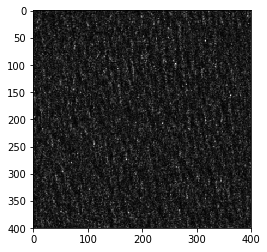

In [50]:
plt.imshow(sigma_vv[:400,:400],'gray')

In [46]:
%matplotlib inline

In [51]:
sar = pd.read_csv('./asf-datapool-results-2018-4-4_15-34-49.csv')

In [53]:
sar.set_index('Granule Name', inplace=True)

In [57]:
label['scending']=[sar.loc[label.loc[x,'sar'],'Ascending or Descending?'] for x in range(53)]

In [58]:
label.head(5)

ecmwf_u_front  ecmwf_u_late  ecmwf_v_front  ecmwf_v_late  ndbc_wdir  \
0      -1.998574      2.246395      -2.391918     -3.099688        133   
1      10.479504      6.840266      -1.451127      3.451000        211   
2       9.987649      5.926822      -1.958544      2.451410        203   
3      10.239634     13.440321      -9.534955     -6.647252        266   
4       9.226850     12.168284      -9.023183     -6.375032        291   

   ndbc_wspeed                                                sar station  \
0         10.6  S1A_IW_GRDH_1SDV_20160110T221737_20160110T2218...   44011   
1         10.2  S1A_IW_GRDH_1SDV_20160220T222648_20160220T2227...   44005   
2         13.6  S1A_IW_GRDH_1SDV_20160220T222648_20160220T2227...   mism1   
3          6.6  S1A_IW_GRDH_1SDV_20160303T222648_20160303T2227...   44005   
4          8.6  S1A_IW_GRDH_1SDV_20160303T222648_20160303T2227...   mism1   

   ecmwf_wspeed_front  ecmwf_wspeed_late  ecmwf_wdir_late  ecmwf_wdir_front  \
0            3.116981           3.828101       144.068537       -140.119451   
1           10.579497           7.661504        63.228482         97.883778   
2           10.177870           6.413785        67.529380        101.094727   
3           13.991621          14.994272       116.315865        132.959097   
4           12.905525          13.737109       117.650295        134.360616   

    scending  
0  Ascending  
1  Ascending  
2  Ascending  
3  Ascending  
4  Ascending

In [61]:
direction.main_lg(sigma_vv[:400,:400])

NameError: name 'cordir' is not defined

In [60]:
import direction

In [6]:
label.to_csv('./sar_ndbc_ecmwf_dataset_subset_1300.csv', index=False)

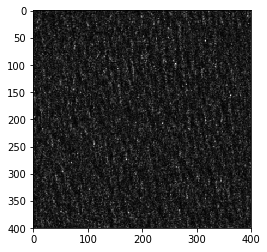

In [7]:
label = pd.read_csv('./sar_ndbc_ecmwf_dataset_subset_1300.csv')
nc = Dataset('/Volumes/Yangchao/subset_2000/subset_'+label['sar'][0])
sigma_vv = nc.variables['Sigma0_VV'][:]
%matplotlib inline
plt.imshow(sigma_vv[:400,:400],'gray')

In [8]:
direction.main_lg(sigma_vv[:400,:400])

array([160, 170, 155, 165])

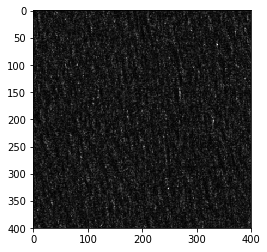

In [5]:
plt.imshow(sigma_vv[400:800,400:800],'gray')

In [6]:
direction.main_lg(sigma_vv[400:800,400:800])

array([155, 165, 170, 160])

In [9]:
np.arctan(1/4)*180/np.pi

14.036243467926477

(-0.5, 399.5, 399.5, -0.5)

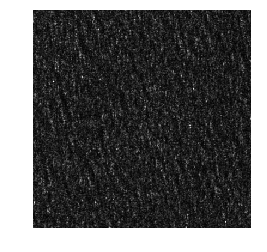

In [9]:
plt.imshow(sigma_vv[800:1200,800:1200],'gray')
plt.axis('off')

In [8]:
direction.main_lg(sigma_vv[800:1200,800:1200])

array([165, 155, 170, 160])

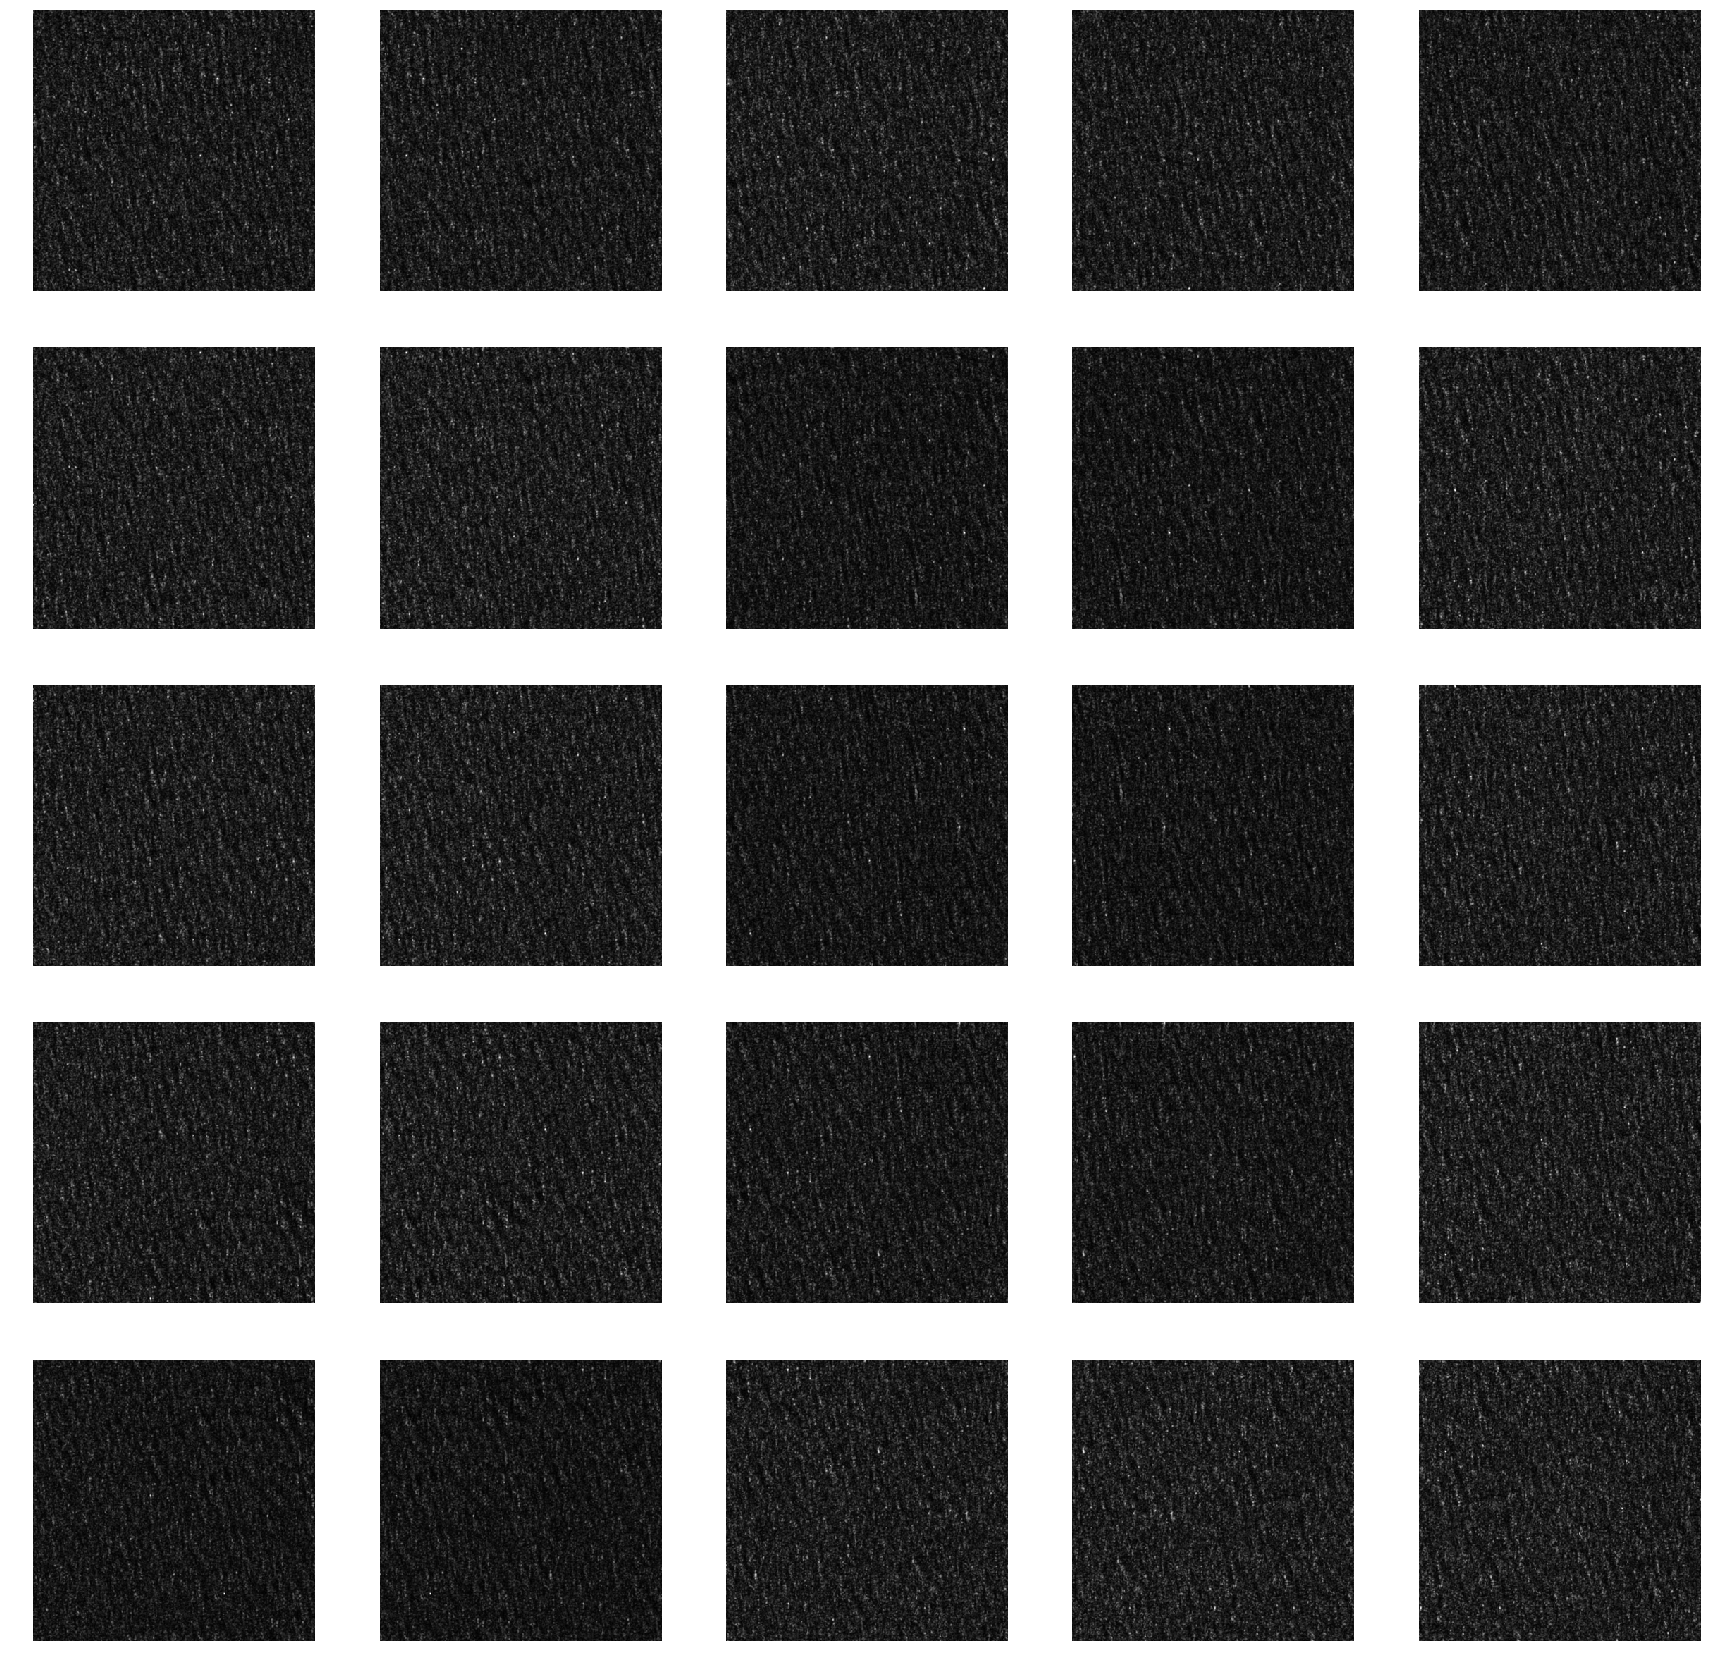

In [9]:
plt.figure(figsize=(30,30))
for i in range(5):
    for j in range(5):
        plt.subplot(5,5,j+i*5+1)
        plt.imshow(sigma_vv[i*200:i*200+400,j*200:j*200+400],'gray')
        plt.axis('off')

In [10]:
for i in range(5):
    for j in range(5):
        print(direction.main_lg(sigma_vv[i*200:i*200+400,j*200:j*200+400],'gray'),end=',')
    print('\n')

[160 170 155 165],[155 170 160 165],[155 160 170 165],[175 160 165 170],[170 165 155 160],

[170 160 165 155],[155 170 160 165],[155 165 170 160],[155 165 170 160],[155 170 165 160],

[150 165 160 155],[155 170 165 160],[155 165 170 160],[155 165 170 160],[160 165 175 170],

[160 155 170 165],[155 170 160 165],[155 170 165 160],[175 170 165 160],[175 165 160 170],

[170 160 155 165],[170 155 165 160],[175 170 165 160],[170 155 165 160],[165 155 170 160],



In [24]:
nc = Dataset('/Volumes/Yangchao/subset_2000/subset_'+label['sar'][50]+'.dim')
sigma_vv = nc.variables['Sigma0_VV'][:]
sigma_vh = nc.variables['Sigma0_VH'][:]
lat = nc.variables['latitude'][:]
lon = nc.variables['longitude'][:]
print(label.loc[50,['ndbc_wdir','scending','ndbc_wspeed']])

ndbc_wdir      267
scending       NaN
ndbc_wspeed    7.8
Name: 50, dtype: object


/Users/yangchao/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:1020: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


In [25]:
gc.collect()

194

AttributeError: 'NoneType' object has no attribute 'update'

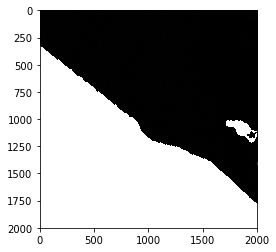

In [32]:
plt.imshow(sigma_vv,'gray')
plt.xticks（
plt.yticks('off')

/Users/yangchao/GitHub/winddir/new/match_up/direction.py:39: RuntimeWarning: invalid value encountered in true_divide
  return np.abs(r_1)/r_2, r_1
/Users/yangchao/GitHub/winddir/new/match_up/direction.py:50: RuntimeWarning: invalid value encountered in greater_equal
  cor_dir = r[(cor>=0)*(cor<=1)]
/Users/yangchao/GitHub/winddir/new/match_up/direction.py:50: RuntimeWarning: invalid value encountered in less_equal
  cor_dir = r[(cor>=0)*(cor<=1)]
/Users/yangchao/GitHub/winddir/new/match_up/direction.py:51: RuntimeWarning: divide by zero encountered in true_divide
  q = cor_dir.imag/cor_dir.real
/Users/yangchao/anaconda/lib/python3.5/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/Users/yangchao/anaconda/lib/python3.5/site-packages/matplotlib/image.py:406: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/Users/yangchao/anaconda/lib/python3.5/site-packages/matplo

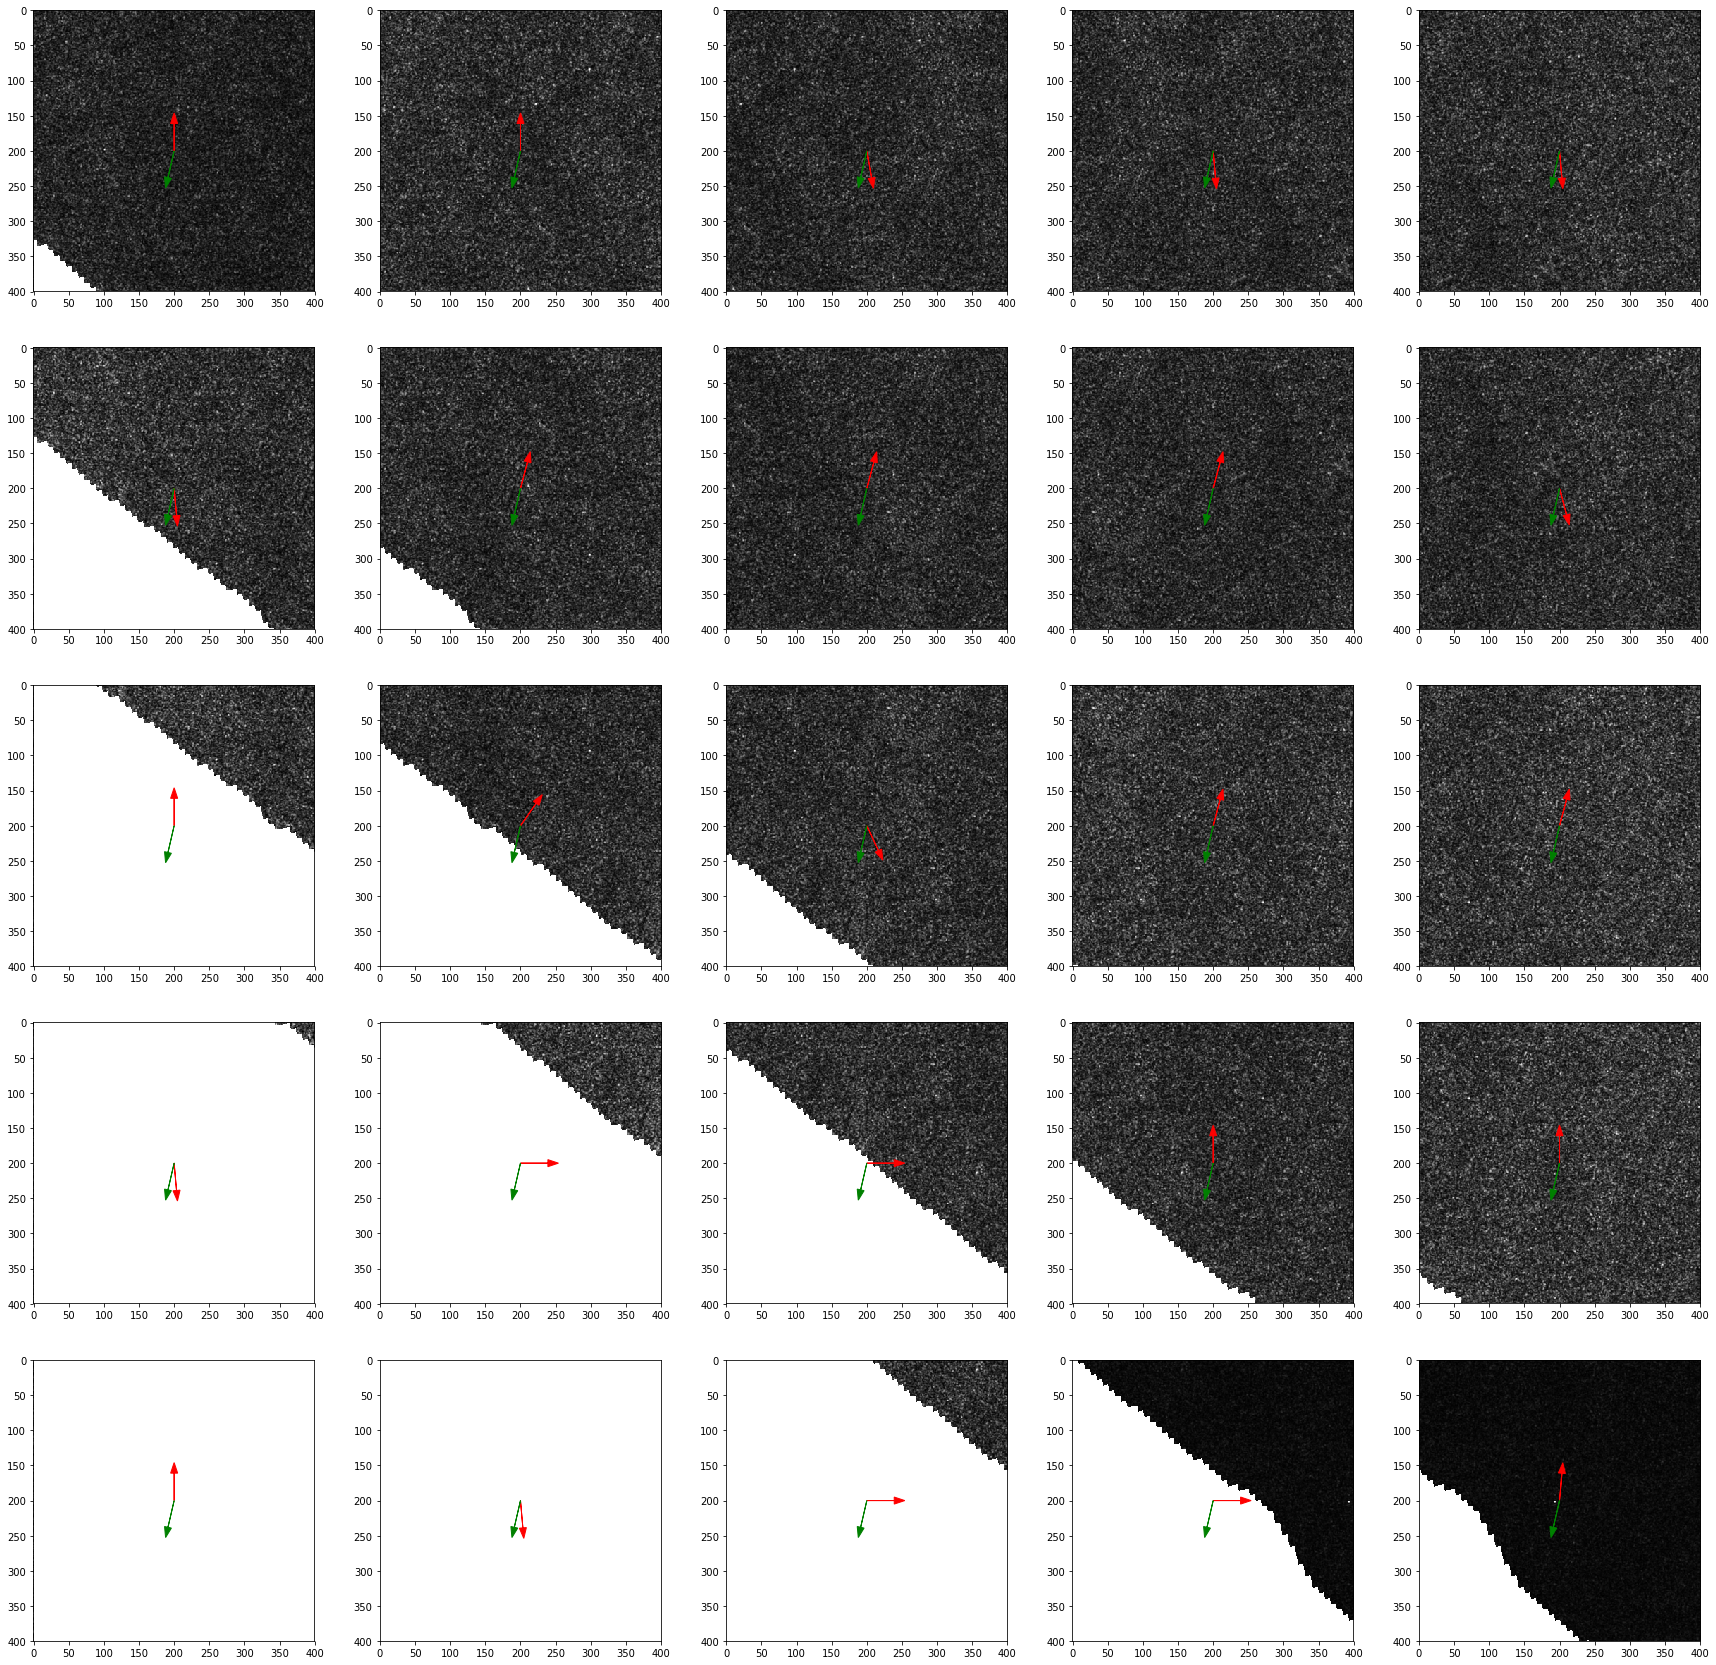

In [29]:
plt.figure(figsize=(30,30))
for i in range(5):
    for j in range(5):
        plt.subplot(5,5,j+i*5+1)
        plt.imshow(sigma_vv[i*200:i*200+400,j*200:j*200+400],'gray')
        direc = direction.main_lg(sigma_vv[i*200:i*200+400,j*200:j*200+400],'gray')
        plt.arrow(200,200,np.cos((direc[-1]-90)/180*np.pi)*label.ndbc_wspeed[50]*5,np.sin((direc[-1]-90)/180*np.pi)*label.ndbc_wspeed[50]*5,color='red',head_width=10)
        plt.arrow(200,200,np.cos((10-label.ndbc_wdir[50])%180/180*np.pi)*label.ndbc_wspeed[50]*5,np.sin((10-label.ndbc_wdir[50])%180/180*np.pi)*label.ndbc_wspeed[50]*5,color='green',head_width=10)
        plt.axis('off')

In [30]:
for i in range(5):
    for j in range(5):
        print(direction.main_lg(sigma_vv[i*200:i*200+400,j*200:j*200+400],'gray'),end=',')
    print('\n')

/Users/yangchao/GitHub/winddir/new/match_up/direction.py:39: RuntimeWarning: invalid value encountered in true_divide
  return np.abs(r_1)/r_2, r_1
/Users/yangchao/GitHub/winddir/new/match_up/direction.py:50: RuntimeWarning: invalid value encountered in greater_equal
  cor_dir = r[(cor>=0)*(cor<=1)]
/Users/yangchao/GitHub/winddir/new/match_up/direction.py:50: RuntimeWarning: invalid value encountered in less_equal
  cor_dir = r[(cor>=0)*(cor<=1)]
/Users/yangchao/GitHub/winddir/new/match_up/direction.py:51: RuntimeWarning: divide by zero encountered in true_divide
  q = cor_dir.imag/cor_dir.real


[15 65 25  0],[135 170  15   0],[  0  10   5 170],[170 165   0 175],[110  10 140 175],

[  5 170   0 175],[25 30 35 15],[25 50 35 15],[170   5   0  15],[175   0  15 165],

[  5 170 175   0],[ 70 175  90  35],[165 170 150 155],[175   5   0  15],[175   0   5  15],

[  5 170   0 175],[110  45 100  90],[155 110  75  90],[10 15  5  0],[ 15  10 160   0],

[  5 170 175   0],[ 70  75 170 175],[95 75 70 90],[ 0 10 95 90],[  0  10 175   5],



In [26]:
label.head(10)

ecmwf_u_front  ecmwf_u_late  ecmwf_v_front  ecmwf_v_late  ndbc_wdir  \
0      -1.998574      2.246395      -2.391918     -3.099688        133   
1      10.479504      6.840266      -1.451127      3.451000        211   
2       9.987649      5.926822      -1.958544      2.451410        203   
3      10.239634     13.440321      -9.534955     -6.647252        266   
4       9.226850     12.168284      -9.023183     -6.375032        291   
5      -1.230506     -2.972591      -9.495756     -9.957440         86   
6      -0.489090     -2.558271      -8.125948     -8.629009         94   
7       2.912700      3.300369       5.217160      7.203273        156   
8       3.486934      3.860065       4.511567      5.347825        198   
9      -1.535795      6.176384      -0.499448     -1.157130        211   

   ndbc_wspeed                                                sar station  \
0         10.6  S1A_IW_GRDH_1SDV_20160110T221737_20160110T2218...   44011   
1         10.2  S1A_IW_GRDH_1SDV_20160220T222648_20160220T2227...   44005   
2         13.6  S1A_IW_GRDH_1SDV_20160220T222648_20160220T2227...   mism1   
3          6.6  S1A_IW_GRDH_1SDV_20160303T222648_20160303T2227...   44005   
4          8.6  S1A_IW_GRDH_1SDV_20160303T222648_20160303T2227...   mism1   
5         12.4  S1A_IW_GRDH_1SDV_20160315T222648_20160315T2227...   44005   
6         15.2  S1A_IW_GRDH_1SDV_20160315T222648_20160315T2227...   mism1   
7          3.2  S1A_IW_GRDH_1SDV_20160327T222648_20160327T2227...   44005   
8          4.0  S1A_IW_GRDH_1SDV_20160327T222648_20160327T2227...   mism1   
9         13.4  S1A_IW_GRDH_1SDV_20160401T223426_20160401T2234...   44020   

   ecmwf_wspeed_front  ecmwf_wspeed_late  ecmwf_wdir_late  ecmwf_wdir_front  \
0            3.116981           3.828101       144.068537       -140.119451   
1           10.579497           7.661504        63.228482         97.883778   
2           10.177870           6.413785        67.529380        101.094727   
3           13.991621          14.994272       116.315865        132.959097   
4           12.905525          13.737109       117.650295        134.360616   
5            9.575151          10.391675      -163.378075       -172.616480   
6            8.140653           9.000253      -163.486317       -176.555596   
7            5.975163           7.923356        24.616128         29.174288   
8            5.702012           6.595403        35.821786         37.699991   
9            1.614966           6.283842       100.611216       -108.014783   

    scending  
0  Ascending  
1  Ascending  
2  Ascending  
3  Ascending  
4  Ascending  
5  Ascending  
6  Ascending  
7  Ascending  
8  Ascending  
9  Ascending

In [34]:
label.

'S1A_IW_GRDH_1SDV_20160315T222648_20160315T222713_010386_00F634_A901'

In [95]:
sigma_vv

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=0.0,
  dtype=float32)

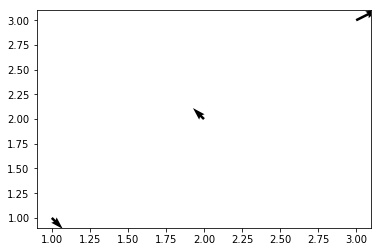

In [11]:
plt.quiver([1,2,3],[1,2,3],[1,-1,2],[-1,1,1])

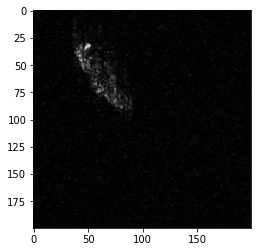

In [71]:

plt.imshow(sigma_vh[600:800,600:800],'gray')


In [75]:
gc.collect()

52926

In [76]:
label.station.unique()

array(['44011', '44005', 'mism1', '44020', 'buzm3', 'mdrm1', '41004',
       'plsf1', '42013', '42022', '44066', '41037', '41064', '41001',
       '44065', '44018', '41010'], dtype=object)

In [77]:
label

ecmwf_u_front  ecmwf_u_late  ecmwf_v_front  ecmwf_v_late  ndbc_wdir  \
0       -1.998574      2.246395      -2.391918     -3.099688        133   
1       10.479504      6.840266      -1.451127      3.451000        211   
2        9.987649      5.926822      -1.958544      2.451410        203   
3       10.239634     13.440321      -9.534955     -6.647252        266   
4        9.226850     12.168284      -9.023183     -6.375032        291   
5       -1.230506     -2.972591      -9.495756     -9.957440         86   
6       -0.489090     -2.558271      -8.125948     -8.629009         94   
7        2.912700      3.300369       5.217160      7.203273        156   
8        3.486934      3.860065       4.511567      5.347825        198   
9       -1.535795      6.176384      -0.499448     -1.157130        211   
10     -39.234128    -39.234128     -44.598995    -44.598995        209   
11       1.715774      2.399040       7.782556      8.488148        203   
12       2.268201      2.689791       6.907098      7.397093        237   
13       3.450590      2.900586      -3.589683     -0.460249        186   
14       2.454767      2.478996      -5.022646     -0.719401        189   
15      -6.791125     -5.967330      -5.148956     -3.776970        182   
16      -5.632966     -4.280972      -4.155899     -2.341829        163   
17      -2.921710     -0.397019       0.190900      0.452231        175   
18      -1.736898      0.790216       1.915683      1.445287        164   
19     -39.234128    -39.234128     -44.598995    -44.598995        218   
20       4.080551      4.681437       8.758190      8.938944        150   
21       4.613596      4.914039       8.435882      8.494682        140   
22       3.850373      4.223504       8.096152      7.710690        135   
23      -2.177871     -3.704315      -1.952011      1.630397        201   
24      -0.440632     -2.601883      -0.847889      2.649586        234   
25      -7.508312     -7.135181      -2.566138     -1.202863        197   
26      -5.446400     -4.959392      -1.403217     -0.813045        215   
27       6.985642      9.333459      -3.219465     -4.961669         10   
28       7.220666      8.720458      -2.942890     -3.644127         21   
29     -39.234128    -39.234128     -44.598995    -44.598995         29   
30     -39.234128    -39.234128     -44.598995    -44.598995        353   
31       6.001933      2.878779       0.147345     -3.374085         26   
32     -39.234128    -39.234128     -44.598995    -44.598995        270   
33     -39.234128    -39.234128     -44.598995    -44.598995        271   
34     -39.234128    -39.234128     -44.598995    -44.598995        128   
35     -39.234128    -39.234128     -44.598995    -44.598995        320   
36     -39.234128    -39.234128     -44.598995    -44.598995        293   
37     -39.234128    -39.234128     -44.598995    -44.598995        266   
38       3.738919      2.995080       4.261125      1.928749         35   
39       5.214482      4.516678       6.173194      4.809919          1   
40       6.246649      5.546423       5.639644      2.290256        358   
41       7.925738      6.527708      -1.514282      0.426098        224   
42       4.005441      3.094420       4.021572      5.807331        205   
43       4.824390      3.898832       4.287258      6.397503        223   
44       3.736496      4.441568       5.029873      5.378314         61   
45       5.132102      4.206544       3.096026      0.005791        153   
46      -2.112452      0.417085      -1.013398      3.048115         88   
47     -39.234128    -39.234128     -44.598995    -44.598995         59   
48      -0.801648     -1.441301       4.472367      6.859187        172   
49       2.791554      2.619526       4.598677      6.049062        213   
50       5.161177      1.105196      -0.050831     -2.857957        310   
51       4.451259      2.873933      -4.473852     -3.180265        299   
52       4.233196      2.4959

/Users/yangchao/anaconda/lib/python3.5/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/Users/yangchao/anaconda/lib/python3.5/site-packages/matplotlib/image.py:406: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/Users/yangchao/anaconda/lib/python3.5/site-packages/matplotlib/image.py:412: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/Users/yangchao/anaconda/lib/python3.5/site-packages/matplotlib/image.py:417: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/Users/yangchao/anaconda/lib/python3.5/site-packages/matplotlib/colors.py:916: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/Users/yangchao/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:716: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy

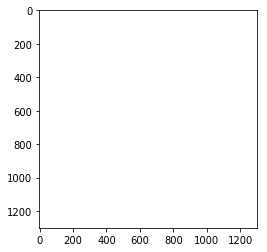

In [87]:
plt.imshow(sigma_vv)

In [97]:
nc.variables.keys()

odict_keys(['Sigma0_VH', 'Sigma0_VV', 'latitude', 'longitude', 'incident_angle', 'elevation_angle', 'slant_range_time', 'lat', 'lon'])

In [100]:
lat

array([[24.623766, 24.623783, 24.6238  , ..., 24.64523 , 24.645245,
        24.645262],
       [24.623857, 24.623873, 24.62389 , ..., 24.645319, 24.645334,
        24.645351],
       [24.623947, 24.623962, 24.62398 , ..., 24.645409, 24.645426,
        24.645441],
       ...,
       [24.74045 , 24.740467, 24.740482, ..., 24.761902, 24.761917,
        24.761934],
       [24.74054 , 24.740557, 24.740574, ..., 24.761992, 24.762007,
        24.762024],
       [24.74063 , 24.740646, 24.740664, ..., 24.762081, 24.762098,
        24.762114]], dtype=float32)

In [4]:
os.listdir('/Volumes/Yangchao/subset_2000_nomask/')

['subset_S1A_IW_GRDH_1SDV_20170416T230513_20170416T230538_016176_01ABB0_6C3F.data',
 'subset_S1A_IW_GRDH_1SDV_20170416T230513_20170416T230538_016176_01ABB0_6C3F.dim',
 'subset_S1A_IW_GRDH_1SDV_20170418T224911_20170418T224936_016205_01AC97_F9E0.data',
 'subset_S1A_IW_GRDH_1SDV_20170418T224911_20170418T224936_016205_01AC97_F9E0.dim',
 'subset_S1A_IW_GRDH_1SDV_20170420T223430_20170420T223459_016234_01AD81_6351.data',
 'subset_S1A_IW_GRDH_1SDV_20170420T223430_20170420T223459_016234_01AD81_6351.dim',
 'subset_S1A_IW_GRDH_1SDV_20170421T231221_20170421T231246_016249_01ADF0_C87E.data',
 'subset_S1A_IW_GRDH_1SDV_20170421T231221_20170421T231246_016249_01ADF0_C87E.dim',
 'subset_S1A_IW_GRDH_1SDV_20170421T231311_20170421T231336_016249_01ADF0_2DDB.data',
 'subset_S1A_IW_GRDH_1SDV_20170421T231311_20170421T231336_016249_01ADF0_2DDB.dim',
 'subset_S1A_IW_GRDH_1SDV_20170424T233537_20170424T233602_016293_01AF45_9DD2.data',
 'subset_S1A_IW_GRDH_1SDV_20170424T233537_20170424T233602_016293_01AF45_9DD2.dim'

In [22]:
with os.popen('cd /Volumes/Yangchao/subset_2000_nomask/ && ls *.dim') as flists:
    for file_ in flists:
        product = ProductIO.readProduct('/Volumes/Yangchao/subset_2000_nomask/'+file_[:-1])
        tar = calibrate.mask(product)
        ProductIO.writeProduct(tar, '/Volumes/Yangchao/subset_2000/'+file_[:-1], 'NETCDF4-CF')
        product.dispose()
        tar.dispose()
        del product
        del tar
        gc.collect()

----mask----
----mask----
----mask----
----mask----
----mask----
----mask----
----mask----
----mask----
----mask----
----mask----
----mask----
----mask----
----mask----
----mask----
----mask----
----mask----
----mask----
----mask----
----mask----
----mask----
----mask----
----mask----
----mask----
----mask----
----mask----
----mask----
----mask----
----mask----
----mask----
----mask----
----mask----
----mask----
----mask----
----mask----
----mask----


In [10]:
label = pd.read_csv('./sar_ndbc_ecmwf_dataset_subset_2000.csv')

In [11]:
label.head(5)

Unnamed: 0  ecmwf_u_front  ecmwf_u_late  ecmwf_v_front  ecmwf_v_late  \
0           0      -1.998574      2.246395      -2.391918     -3.099688   
1           1      10.479504      6.840266      -1.451127      3.451000   
2           2       9.987649      5.926822      -1.958544      2.451410   
3           3      10.239634     13.440321      -9.534955     -6.647252   
4           4       9.226850     12.168284      -9.023183     -6.375032   

   ndbc_wdir  ndbc_wspeed                                                sar  \
0        133         10.6  S1A_IW_GRDH_1SDV_20160110T221737_20160110T2218...   
1        211         10.2  S1A_IW_GRDH_1SDV_20160220T222648_20160220T2227...   
2        203         13.6  S1A_IW_GRDH_1SDV_20160220T222648_20160220T2227...   
3        266          6.6  S1A_IW_GRDH_1SDV_20160303T222648_20160303T2227...   
4        291          8.6  S1A_IW_GRDH_1SDV_20160303T222648_20160303T2227...   

  station  
0   44011  
1   44005  
2   mism1  
3   44005  
4   mism1

In [13]:
label.ecmwf_u_front.astype('float32', inplace=True)

0     -1.998574
1     10.479504
2      9.987649
3     10.239634
4      9.226850
5     -1.230506
6     -0.489090
7      2.912700
8      3.486934
9     -4.334277
10    -1.535795
11   -39.234127
12     1.715774
13     2.268202
14     3.450590
15     2.454767
16    -6.791125
17    -5.632966
18    -2.921710
19    -1.736898
20     1.272378
21     2.355427
22   -39.234127
23     4.080552
24     4.613595
25     3.850373
26    -2.177871
27    -0.440632
28    -7.508312
29    -5.446401
        ...    
38     9.069360
39   -39.234127
40     3.288254
41   -39.234127
42     7.414500
43   -39.234127
44     5.594881
45   -39.234127
46     2.510494
47     2.747941
48   -39.234127
49     4.245310
50     4.628133
51   -39.234127
52     3.738919
53     5.214482
54     6.246649
55     7.925738
56   -39.234127
57     4.005441
58     4.824390
59     3.736496
60    -2.739990
61    -2.112452
62   -39.234127
63    -0.801648
64     2.791554
65     5.161177
66     4.451259
67     4.233196
Name: ecmwf_u_front, Len

In [16]:
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 9 columns):
Unnamed: 0       68 non-null int64
ecmwf_u_front    68 non-null float64
ecmwf_u_late     68 non-null float64
ecmwf_v_front    68 non-null float64
ecmwf_v_late     68 non-null float64
ndbc_wdir        68 non-null int64
ndbc_wspeed      68 non-null float64
sar              68 non-null object
station          68 non-null object
dtypes: float64(5), int64(2), object(2)
memory usage: 4.9+ KB


In [17]:
del label['Unnamed: 0']

In [18]:
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 8 columns):
ecmwf_u_front    68 non-null float64
ecmwf_u_late     68 non-null float64
ecmwf_v_front    68 non-null float64
ecmwf_v_late     68 non-null float64
ndbc_wdir        68 non-null int64
ndbc_wspeed      68 non-null float64
sar              68 non-null object
station          68 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 4.3+ KB


In [19]:
label.to_csv('./sar_ndbc_ecmwf_dataset_subset_2000.csv', index=False)

In [20]:
label.sar[1]

'S1A_IW_GRDH_1SDV_20160220T222648_20160220T222713_010036_00EC50_7340'